In [ ]:
## ник на kaggle - Кирилл_Ионкин
## best public kaggle score: 0.84578

In [3]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
%matplotlib inline

# Data preprocssing

In [4]:
data_train = pd.read_csv('./train.csv')
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data_test = pd.read_csv("test.csv")
data_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [110]:
data_train.sample()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4339,6,84.85,523.5,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,1


In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data_train.info() # NaN отсутствуют в train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data_test.info() # аналогично

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [9]:
data_train.describe() # IsSeniorCitizen является категорильаным признаком, поэтому такие маленькие значения

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [10]:
data_train.describe(include="object")
# TotalSpent не является категориальным признаком - его тип "object" - переведем в int

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,20.2,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [11]:
data_test.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen
count,1761.000000,1761.000000,1761.000000
mean,32.293583,64.272601,0.170358
std,24.593736,29.832517,0.376054
min,0.000000,18.550000,0.000000
25%,9.000000,35.650000,0.000000
50%,29.000000,70.050000,0.000000
75%,56.000000,89.400000,0.000000
max,72.000000,117.350000,1.000000


In [12]:
data_test.describe(include="object")

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761
unique,1710,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,20.25,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,4,900,936,1257,1600,879,755,886,756,778,869,711,704,955,1023,579


In [13]:
len(data_train.describe(include="object").loc["unique"]) ==  len(data_test.describe(include="object").loc["unique"])
# прекрасно, уникальные значения совпадают в train и test

True

In [14]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [15]:
data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [16]:
pd.to_numeric(data_train["TotalSpent"], errors="errors") # видимо есть нечисловые представления в примерах

ValueError: invalid error value specified

In [17]:
pd.to_numeric(data_train["TotalSpent"], errors="coerce").isna().sum() # 9 нечисловых значения, ладно, посмотрим, что с этим можно сделать

9

In [18]:
data_train["TotalSpent"] = pd.to_numeric(data_train["TotalSpent"], errors="coerce")
# просто переведем в числовой тип, а нечисловые значения заменим NaN, 
# а NaN в дальнейшем заменим с помощью SimpleImputer

In [19]:
pd.to_numeric(data_test["TotalSpent"], errors="errors")

ValueError: invalid error value specified

In [20]:
pd.to_numeric(data_test["TotalSpent"], errors="coerce").isna().sum()

2

In [21]:
data_test["TotalSpent"] = pd.to_numeric(data_test["TotalSpent"], errors="coerce")

In [22]:
# почему в некоторых колонках по три варианта, хотя логично быть только 2м варинтам
strange_cat_columns = data_train.describe(include="object").loc["unique"] > 2
strange_cat_columns

Sex                         False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers      True
HasInternetService           True
HasOnlineSecurityService     True
HasOnlineBackup              True
HasDeviceProtection          True
HasTechSupportAccess         True
HasOnlineTV                  True
HasMovieSubscription         True
HasContractPhone             True
IsBillingPaperless          False
PaymentMethod                True
Name: unique, dtype: bool

In [23]:
strange_cat_columns_data = data_train[cat_cols].drop(columns="IsSeniorCitizen").loc[:, strange_cat_columns.values]
strange_cat_columns_data.head()

,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,PaymentMethod
0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check
1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic)
2,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Electronic check
3,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Mailed check
4,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic)


In [24]:
strange_cat_columns_data.describe()

,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,2511,2341,2612,2332,2317,2604,2099,2081,2920,1786


In [25]:
for col in strange_cat_columns_data.columns:
    print(col, strange_cat_columns_data[col].unique())
    print()

HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']

HasInternetService ['No' 'Fiber optic' 'DSL']

HasOnlineSecurityService ['No internet service' 'No' 'Yes']

HasOnlineBackup ['No internet service' 'No' 'Yes']

HasDeviceProtection ['No internet service' 'No' 'Yes']

HasTechSupportAccess ['No internet service' 'Yes' 'No']

HasOnlineTV ['No internet service' 'No' 'Yes']

HasMovieSubscription ['No internet service' 'No' 'Yes']

HasContractPhone ['One year' 'Two year' 'Month-to-month']

PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']



In [26]:
# 'No internet service' - допольнительная категория, которая возникла

In [27]:
strange_index = strange_cat_columns_data.apply(lambda s: s=="No internet service").any(axis=1)
strange_index

0        True
1        True
2       False
3       False
4       False
        ...  
5277    False
5278    False
5279    False
5280    False
5281    False
Length: 5282, dtype: bool

In [28]:
data_train.iloc[strange_index.values]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
18,59,19.85,1188.25,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
22,20,19.50,413.00,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,54,20.50,1035.70,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
5257,1,19.20,19.20,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
5259,47,24.55,1160.45,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
5269,13,20.45,254.50,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0


In [29]:
# предполагаю, что был какой то сбой и все, те, кто HasInternetService == No, 
# получили такие категории - сейчас будем это проверять

data_train.iloc[strange_index.values]["HasInternetService"].value_counts()

No    1141
Name: HasInternetService, dtype: int64

In [30]:
data_train["HasInternetService"].value_counts()
# опа, действительно такая фигня справедлива для тех, кто HasInternetService == No

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

In [31]:
# по продположению, что для тех у кого HasInternetService == No, ВСЕ дальнейшие 
# колонки не имеют смысл, поэтомы они и были заполнены таким значением, 
# поэтому просто заменим это значение на No

# аналогичная логика справедлива для - No phone service


data_train_replace = data_train.replace({"No internet service": "No", "No phone service": "No"})
data_train_replace

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [32]:
# проверяем теперь категории - их должно быть 2, там где ранее было 3
data_train_replace.describe(include="object")

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,3032,2341,3753,3473,3458,3745,3240,3222,2920,3148,1786


In [33]:
# аналогично действуем с test
data_test_replace = data_test.replace({"No internet service": "No", "No phone service": "No"})
data_test_replace

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.80,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [34]:
# проверим уникальные значения - они должны совпадать
len(data_train.describe(include="object").loc["unique"]) ==  len(data_test.describe(include="object").loc["unique"])
# прекрасно)

True

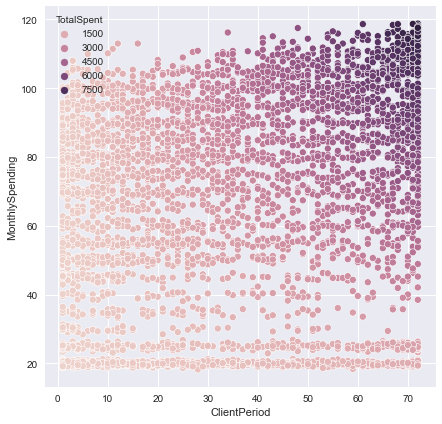

In [35]:
# разберемся с пропущенными значениями в столбце TotalSpent
# их мало, поэтому можно спокойно удалять, но все же посмотрим как они к примеру
# распределены в плоскости числовых данных, так как если это выбросы, то точно
# без угрызений совести можно удалить их

plt.figure(figsize=(7, 7))
sns.scatterplot(x="ClientPeriod", y="MonthlySpending", hue="TotalSpent", data=data_train);
# судя по распределению, можно предположить, что TotalSpent будет неплохо
# подгоняться по значениям ближайших соседей
# но это не решается так просто через KNNImput...
# в идеале обучить бы KnnClassifier и применить...

In [36]:
# закомментированный ниже код - неудачная попытка реализовать свой imputer

In [37]:
# попробуем заменить 
#from sklearn.impute import KNNImputer

#knn_imputer = KNNImputer(n_neighbors=10) # предположим 10 ближайших соседей

#data_train_replace["TotalSpent"] = knn_imputer.fit_transform(data_train_replace[["ClientPeriod", "MonthlySpending", "TotalSpent"]])[:, 2]
#data_train_replace["TotalSpent"].isna().sum() # 0
# прекрасно, от пропусков избавились и аналогично с test

In [38]:
#data_test_replace["TotalSpent"] = knn_imputer.transform(data_test_replace[["ClientPeriod", "MonthlySpending", "TotalSpent"]])[:, 2]
#data_test_replace["TotalSpent"].isna().sum()
# прекрасно, теперь можно перейти к анализу данных

In [39]:
data_train_replace.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [40]:
data_test_replace.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic)


<font color="red" size=3>Действия, которые  необходимо проделать</font>

1) Пропуски в TotalSpent - чем заменять?(свой knn_Imputer реализовать - не получилось, поэтому реализуем через SimpleImputer)

2) Странности в категориальных данных, почему то появялется 3ий вариант(СДЕЛАНО)

3) Закодировать категориальные данные - либо OneHotEncoding, либо LabelEncodicg - пока рано, после анализа данных 

# Data analyse

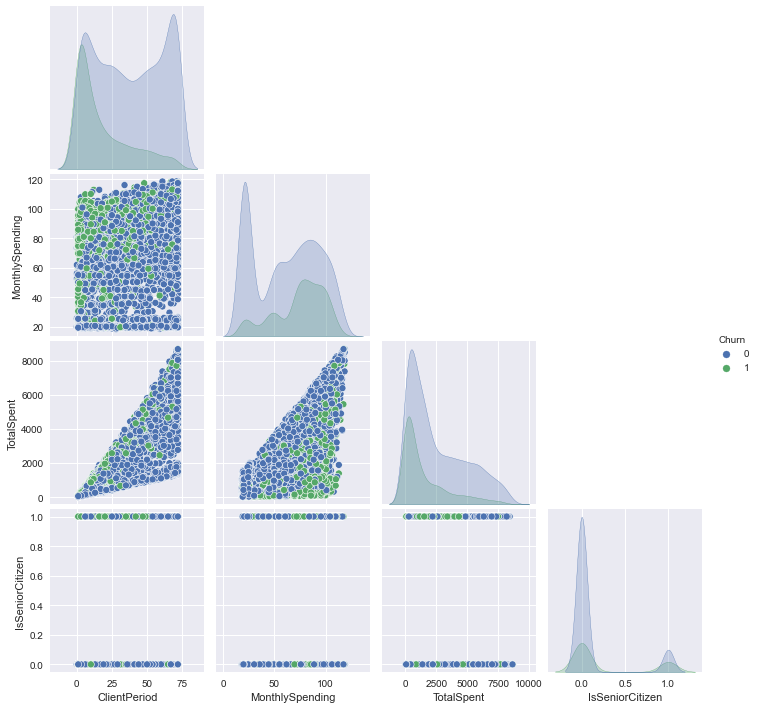

In [73]:
sns.pairplot(data=data_train_replace, hue="Churn", corner=True);
# сложно что-то сказать ....

In [74]:
# судя по всему в основном уходят те, кто недолго пользуется услугами,
# но при этом, тяжело сказать что-то про цену, так как точки сильно разбросаны
# в зависимоти от цены

# больше ушедших, если IsSeniorCitizen = 1

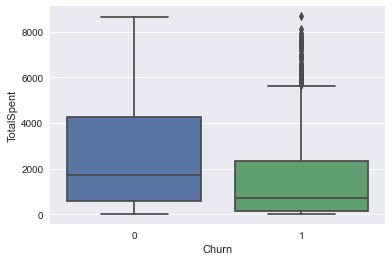

In [75]:
sns.boxplot(x="Churn", y="TotalSpent", data=data_train_replace);
# те, кто ушел имеют меньшую mean TotalSpent

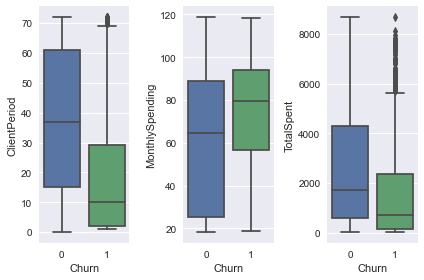

In [76]:
fig, all_axes = plt.subplots(nrows=1, ncols=3)
all_features = ["ClientPeriod", "MonthlySpending", "TotalSpent"]

for axes, feature in zip(all_axes, all_features):
    sns.boxplot(x="Churn", y=feature, data=data_train_replace, ax=axes)
    
plt.tight_layout()

# чаще уходят -  новые клиенты
# также уходят те, кто в месяц платит больше в среднем
# но суммарно они все же платят меньше в среднем, хммммм интересно, а как такое возможно?

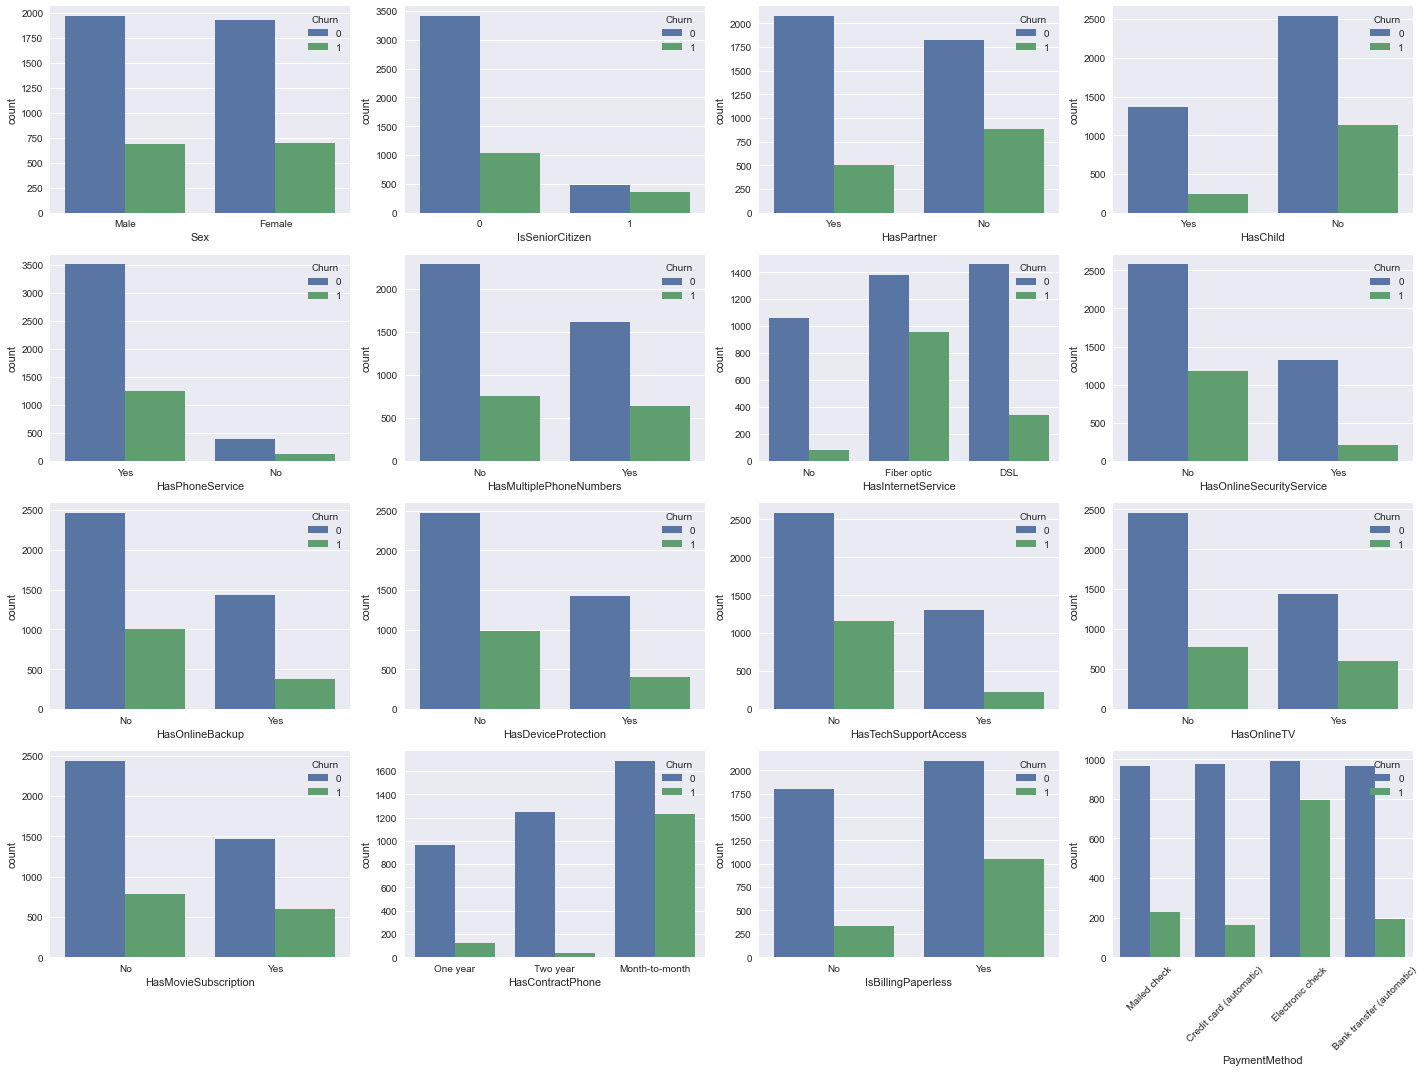

In [77]:
fig, all_axes = plt.subplots(4, 4)
fig.set_size_inches(20, 15)

for axes, cat_col in zip(all_axes.ravel(), cat_cols):
    sns.countplot(x=cat_col, hue="Churn", data=data_train_replace, ax=axes)
    plt.xticks(rotation=45)
plt.tight_layout()

In [78]:
# Electronic check - высокая доля ухода клиентов
# Fiber optic - также высокая доля ушедших
# Month to month также высокая доля ушедших
# Has a child - доля ушедших у тех, у кого нет делей возрастает
# Has Phone Service

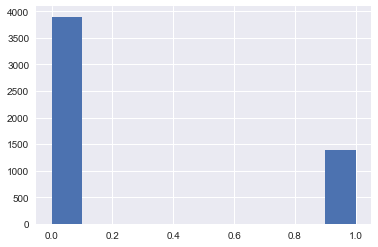

In [79]:
data_train_replace["Churn"].hist();
# очевидно, что классы не сбалансированны

# Применение линейных моделей

## Создание Pipeline предобработки данных

In [80]:
# создадим pipeline обработки численных и категориальных данных

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [82]:
# отделим признаки и метки
y = data_train_replace["Churn"]
X = data_train_replace.drop(columns=["Churn"])

# заменим 0 и 1 более осмысленными значениями для категории IsSeniorCitizen
X["IsSeniorCitizen"].replace({1: "Yes", 0: "No"}, inplace=True)
data_test_replace["IsSeniorCitizen"].replace({1: "Yes", 0: "No"}, inplace=True)


X.shape, y.shape

((5282, 19), (5282,))

In [83]:
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.neighbors import KNeighborsRegressor

#class My_KNN_Imputer(BaseEstimator, TransformerMixin):

#    def __init__(self, n=5, metric='minkowski'):
#        self.n = n
#        self.metric = metric
#        self.knn_reg =  knn_reg = KNeighborsRegressor(n_neighbors=self.n, metric=self.metric, n_jobs=-1)
#        
#    def fit(self, X, y):
#        
#        X_train = X[(~np.isnan(X).all(axis=1))][:,0:2]
#        y_train = X[(~np.isnan(X).all(axis=1))][:,2]
        
#        self.knn_reg.fit(X_train, y_train)
#        print("Finish fit")
        
#    def transform(self, X):
#        X_test = X[(np.isnan(X).any(axis=1))][:,0:2]
#        self.knn_reg.predict(X_test)
#        return X

In [84]:
# к сожалению мне не удалось реализовать данную операцию.....

In [85]:
#from sklearn.base import BaseEstimator, TransformerMixin
#
#class DataFrameSelector(BaseEstimator, TransformerMixin):
#    def __init__(self, attribute_names):
#        self.attribute_names = attribute_names
#    def fit(self, X, y=None):
#        return self
#    def transform(self, X):
#        return X[self.attribute_names]

In [86]:
# создаем Pipeline предобработки данных(пропущенные значения для TotalSpent), 
# также StandartScaler
# также OHE для категорильаных данных

In [87]:
num_pipeline = Pipeline([
    ("simple_imputer", SimpleImputer(strategy="median")),
    ("standart_scaler", StandardScaler())
])

In [88]:
cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(drop="if_binary", sparse=False))
])

In [89]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols), 
    ("cat", cat_pipeline, cat_cols)
])


In [90]:
X_train = preprocess_pipeline.fit_transform(X)
X_train

array([[ 0.92076704, -1.50544655, -0.55732325, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.61328776, -1.29499774, -0.18423477, ...,  1.        ,
         0.        ,  0.        ],
       [-1.27900465,  0.36373662, -0.9765488 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.27900465, -0.32726461, -0.98574534, ...,  0.        ,
         0.        ,  1.        ],
       [-0.13838229,  0.36705077, -0.03292189, ...,  1.        ,
         0.        ,  0.        ],
       [-0.54574742,  0.36373662, -0.40327566, ...,  0.        ,
         0.        ,  1.        ]])

In [91]:
X_train.shape

(5282, 26)

In [92]:
y_train = y
X_kaggle = preprocess_pipeline.transform(data_test_replace)
X_kaggle

array([[ 0.39119238, -0.29246598,  0.04276763, ...,  1.        ,
         0.        ,  0.        ],
       [-0.13838229,  1.11273555,  0.31504701, ...,  0.        ,
         1.        ,  0.        ],
       [-0.95311254,  0.37533616, -0.70795245, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.23826813,  0.87908765, -0.9344035 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.54574742,  0.80120502, -0.29512257, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.61328776,  0.0223787 ,  1.00417011, ...,  0.        ,
         0.        ,  0.        ]])

## Переходим к обучению линейных моделей

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
# решил не делать train_test_split, так как GridSearchCV
# реализовывает кросс-валидацию, и этого будет достаточно,
# хотя впринципе 

In [94]:
log_reg_clf = LogisticRegression(n_jobs=-1)

In [95]:
preprocess_predict_pipeline = Pipeline([
    ("preprocessor", preprocess_pipeline),
    ("log_reg_clf", log_reg_clf)
])

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
%%time
cv_results = cross_val_score(preprocess_predict_pipeline, X, y, scoring="roc_auc", cv=10, verbose=5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 3.23 s


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    3.0s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


In [98]:
cv_results

array([0.85041505, 0.87118613, 0.84648829, 0.82668153, 0.84450019,
       0.82255667, 0.84979562, 0.86319212, 0.84046901, 0.83088902])

In [99]:
cv_results.mean(), cv_results.std()

(0.8446173628283624, 0.014590774803913353)

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid_log_reg_clf = {"log_reg_clf__C": np.logspace(-3, 3, 10),
                          "preprocessor__num__simple_imputer__strategy": ["mean", "median"],
                          "preprocessor__cat__cat_encoder__drop": ["if_binary", None]
                         }
grid_log_reg_clf = GridSearchCV(estimator=preprocess_predict_pipeline,
                                  param_grid=param_grid_log_reg_clf,
                                  scoring="roc_auc",
                                  n_jobs=-1, cv=5, verbose=5)

grid_log_reg_clf.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standart_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                       

In [101]:
grid_log_reg_clf.best_params_, grid_log_reg_clf.best_score_


({'log_reg_clf__C': 46.41588833612773,
  'preprocessor__cat__cat_encoder__drop': 'if_binary',
  'preprocessor__num__simple_imputer__strategy': 'median'},
 0.845058279690447)

In [102]:
best_log_reg_clf = grid_log_reg_clf.best_estimator_

In [103]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Churn', index_label="Id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(len(predicted_labels)),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [104]:
# попробкем отправить результат на kaggle - посмотрим какой скор получился
log_reg_clf_predictions = best_log_reg_clf.predict_proba(data_test_replace)[:, 1]

write_to_submission_file(log_reg_clf_predictions, "log_reg_clf_submit1")

# на kaggle - 0.84578

In [105]:
# попробуем поиграться именно с параметрами лог. регрессии

In [106]:
param_grid_log_reg_clf2 = {"log_reg_clf__C": np.linspace(46-30, 46+50, 60),
                           "log_reg_clf__penalty": ['l1', 'l2', 'elasticnet', 'none'],
                           "log_reg_clf__class_weight": ["balanced", None], 
                           "log_reg_clf__max_iter": [200, 400]
                          }

grid_log_reg_clf2 = GridSearchCV(estimator=grid_log_reg_clf.best_estimator_,
                                  param_grid=param_grid_log_reg_clf2,
                                  scoring="roc_auc",
                                  n_jobs=-1, cv=5, verbose=5)

grid_log_reg_clf2.fit(X, y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4284 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standart_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                       

In [107]:
grid_log_reg_clf2.best_params_, grid_log_reg_clf2.best_score_

({'log_reg_clf__C': 34.983050847457626,
  'log_reg_clf__class_weight': None,
  'log_reg_clf__max_iter': 200,
  'log_reg_clf__penalty': 'l2'},
 0.845076820530228)

In [108]:
grid_log_reg_clf2.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standart_scaler',
                                                                   StandardScaler())]),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
        

In [109]:
# отправим на kaggle решение, посмотрим есть ли улучшения

log_reg_clf2_predictions = grid_log_reg_clf2.best_estimator_.predict_proba(data_test_replace)[:, 1]
write_to_submission_file(log_reg_clf2_predictions, "log_reg_clf_submit2")

# улучшений не произошло, результат ухудшился немного

# Применение градиентного бустинга

In [111]:
from catboost import CatBoostClassifier

In [112]:
X_catboost = X.fillna(X["TotalSpent"].median())
data_test_catboost = data_test_replace.fillna(X["TotalSpent"].median())

In [113]:
X_catboost.isna().sum().sum(), data_test_catboost.isna().sum().sum() # нет NaN

(0, 0)

In [114]:
from sklearn.model_selection import train_test_split

X_train_catboost, X_valid_catboost, y_train_catboost, y_valid_catboost = train_test_split(X_catboost, y, random_state=42, stratify=y)

In [115]:
cat_features_idx = np.where(X_catboost.dtypes == 'object')[0].tolist()
cat_features_idx

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [116]:
catboost_clf = CatBoostClassifier(cat_features=cat_cols)

In [ ]:
catboost_clf.fit(X_train_catboost, y_train_catboost, cat_features=cat_cols)


In [ ]:
# к сожалению я не смог разрешить данный момент, так как мне непонятно, в чем ошибка...